# Telcom Customer Churn data visualization and classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn import preprocessing

In [3]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [6]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
data['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

# Replace 'No phone service' or 'No internet service' with 'No'

From obserervation, having 'No phone service' or 'No internet service' is equivalent to 'No', so in all the columns in the list Noservice corresponding replacement is done.

In [8]:
Noservice = ['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

In [9]:
for x in Noservice:
    data[x]=data[x].apply(lambda x: 'Yes'if x=='Yes' else 'No')

In [10]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

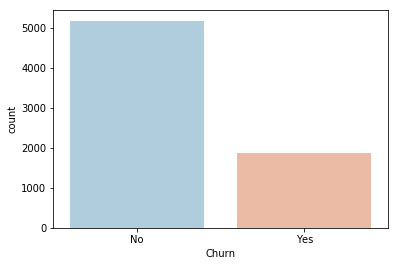

In [11]:
sns.countplot(x='Churn',data=data,palette='RdBu_r')

# Dropping unnecessary column

The 'customerID' is random and has no significance in determining any kind of relationship to churn and hence dropped. Here categorical columns are listed out from continuous columns for creating visualizations.

In [12]:
data.drop('customerID',axis=1,inplace=True)
l2=['tenure','MonthlyCharges', 'TotalCharges', 'Churn' ]
l1=list(data.columns)
category_cols=list(filter(lambda x: x not in l2, l1))
print(type(category_cols[0]))

<class 'str'>


# Count plot of categorical columns with churn

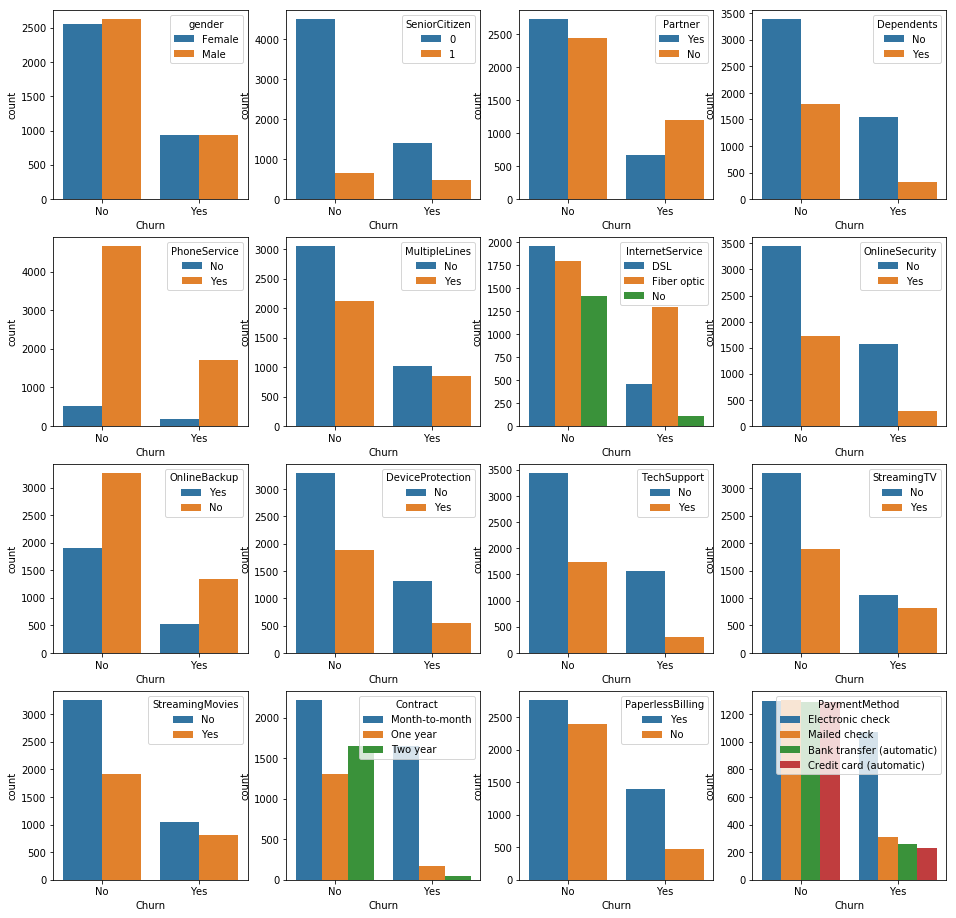

In [13]:
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

iter=0
for x_iter in [0,1,2,3]:
    for y_iter in [0,1,2,3]:
        abc= category_cols[iter]
        sns.countplot( x= "Churn", data=data,  hue=abc, orient='v' , ax=axes[x_iter,y_iter])
        iter=iter+1

In [14]:
print(data['TotalCharges'].dtype)

object


# Data wrangling/munging

TotalCharges should be numerical but is recoginzed as object by pandas hence it contains some junk values string, 
hence non-numeric junk values are replace by null value and cleaned

In [15]:
#Replace non numeric values with null values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

'TotalCharges' column contains null values, hence the rows are dropped from the dataframe

In [16]:
idx =data['TotalCharges'].isna()
data=data[~idx]
#data.dropna()

# kde plot of continuous columns with churn

In [17]:
def conti_Plot(feature):
    plt.figure(figsize=(10, 5))
    plt.title("Pdf for {}".format(feature))
    ax0 = sns.kdeplot(data[data['Churn'] == 'No'][feature].dropna(), color= 'green', label= 'Churn: No')
    ax1 = sns.kdeplot(data[data['Churn'] == 'Yes'][feature].dropna(), color= 'red', label= 'Churn: Yes')

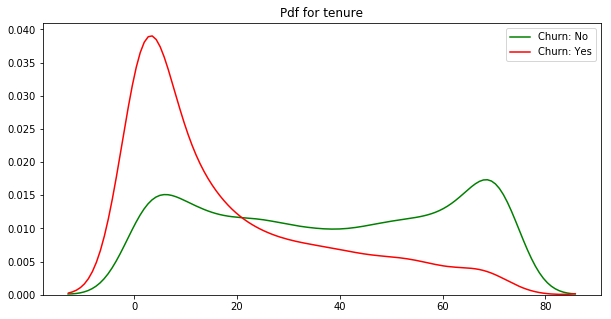

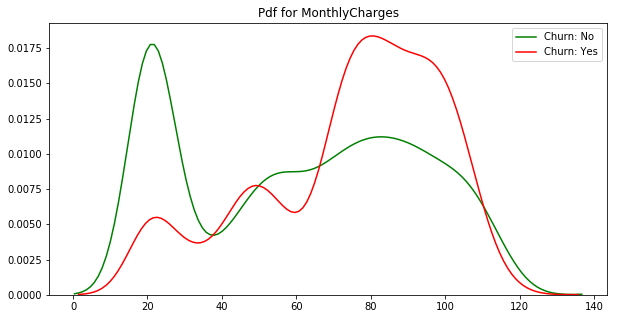

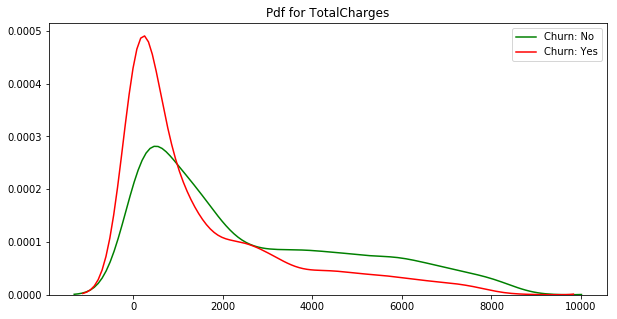

In [18]:
conti_Plot('tenure')
conti_Plot('MonthlyCharges')
conti_Plot('TotalCharges')

Tenure and MonthlyCharges are probably important features

# Label encoding categorical columns values 

In [19]:
le = preprocessing.LabelEncoder()
for m in category_cols:
    data[m]=le.fit_transform(data[m])

In [20]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,No
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,No
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,Yes
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,No
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,Yes


In [21]:
#le = preprocessing.LabelEncoder()

#data['PaperlessBilling']=le.fit_transform(data['PaperlessBilling'])
#data['MultipleLines'] = pd.get_dummies(data['MultipleLines'])

# Correlation matrix of all the valables

In [22]:
correlation=data.corr()
correlation.style.background_gradient()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
gender,1,-0.00181939,-0.00137905,0.0103489,0.00528537,-0.00751498,-0.00888274,-0.00223586,-0.0163278,-0.0130928,-0.000806746,-0.00850716,-0.0071244,-0.0101054,9.46992e-05,-0.0119019,0.0169424,-0.0137793,4.78395e-05
SeniorCitizen,-0.00181939,1,0.0169566,-0.21055,0.0156835,0.00839161,0.142996,-0.0321597,-0.0385764,0.0666628,0.0595139,-0.0605768,0.105445,0.119842,-0.14182,0.156258,-0.0381578,0.219874,0.102411
Partner,-0.00137905,0.0169566,1,0.452269,0.381912,0.0183972,0.142561,0.00051251,0.143346,0.141849,0.153556,0.120206,0.124483,0.118108,0.294094,-0.0139567,-0.156232,0.097825,0.319072
Dependents,0.0103489,-0.21055,0.452269,1,0.163386,-0.00107781,-0.0243067,0.0440299,0.0807855,0.0236388,0.0138997,0.0630532,-0.0164987,-0.0383749,0.240556,-0.110131,-0.0419891,-0.112343,0.0646532
tenure,0.00528537,0.0156835,0.381912,0.163386,1,0.00787733,0.332399,-0.0298348,0.328297,0.361138,0.36152,0.325288,0.280264,0.285402,0.676734,0.00482316,-0.370087,0.246862,0.82588
PhoneService,-0.00751498,0.00839161,0.0183972,-0.00107781,0.00787733,1,0.27953,0.387266,-0.0916757,-0.0521334,-0.0700756,-0.0951385,-0.0213827,-0.0334775,0.00301869,0.0166961,-0.00549894,0.248033,0.113008
MultipleLines,-0.00888274,0.142996,0.142561,-0.0243067,0.332399,0.27953,1,0.0113456,0.098592,0.202228,0.201733,0.100421,0.257804,0.259194,0.107529,0.163746,-0.17124,0.490912,0.469042
InternetService,-0.00223586,-0.0321597,0.00051251,0.0440299,-0.0298348,0.387266,0.0113456,1,-0.392174,-0.313708,-0.305757,-0.388535,-0.24133,-0.250144,0.0995792,-0.138166,0.0845043,-0.322173,-0.175691
OnlineSecurity,-0.0163278,-0.0385764,0.143346,0.0807855,0.328297,-0.0916757,0.098592,-0.392174,1,0.283285,0.274875,0.354458,0.175514,0.187426,0.24566,-0.00405125,-0.149112,0.296447,0.412619
OnlineBackup,-0.0130928,0.0666628,0.141849,0.0236388,0.361138,-0.0521334,0.202228,-0.313708,0.283285,1,0.303058,0.293705,0.281601,0.274523,0.155262,0.127056,-0.17072,0.441529,0.5101


In [23]:
"""
Heat map of correlation matrix

plt.figure(figsize=(12, 12))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, 
                 linewidths=.2, cmap=sns.diverging_palette(255, 133, s=85, l=25, n=7))
"""

'\nHeat map of correlation matrix\n\nplt.figure(figsize=(12, 12))\nsns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, \n                 linewidths=.2, cmap=sns.diverging_palette(255, 133, s=85, l=25, n=7))\n'

# Train & test data splitting

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Churn',axis=1), 
                                                    data['Churn'], test_size=0.30, 
                                                    random_state=101)

# LogisticRegression classifier

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
log_predictions = logmodel.predict(X_test)

In [29]:
print(confusion_matrix(y_test,log_predictions))

[[1403  177]
 [ 241  289]]


In [30]:
print(classification_report(y_test,log_predictions))

             precision    recall  f1-score   support

         No       0.85      0.89      0.87      1580
        Yes       0.62      0.55      0.58       530

avg / total       0.79      0.80      0.80      2110



In [31]:
accuracy=accuracy_score(y_test,log_predictions)
print(accuracy)

0.8018957345971564


# support vector machine classifier

In [32]:
from sklearn.svm import SVC

In [33]:
model = SVC()

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
param_grid = {'C': [0.1,0.5, 1 ,5 , 10], 'gamma': [0.01,0.005, 0.001, 0.0005, 0.0001], 'kernel': ['rbf']}

In [36]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)
grid.best_params_

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.7448233861144945, total=   2.6s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s


[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.749390243902439, total=   2.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.2s remaining:    0.0s


[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.7542682926829268, total=   2.3s
[CV] C=0.1, gamma=0.005, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.005, kernel=rbf, score=0.7484774665042631, total=   2.5s
[CV] C=0.1, gamma=0.005, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.005, kernel=rbf, score=0.749390243902439, total=   2.5s
[CV] C=0.1, gamma=0.005, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.005, kernel=rbf, score=0.7548780487804878, total=   1.9s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.7594397076735688, total=   2.2s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.7585365853658537, total=   2.5s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.7615853658536585, total=   2.3s
[CV] C=0.1, gamma=0.0005, kern

[CV]  C=5, gamma=0.0001, kernel=rbf, score=0.7829268292682927, total=   1.3s
[CV] C=5, gamma=0.0001, kernel=rbf ...................................
[CV]  C=5, gamma=0.0001, kernel=rbf, score=0.7871951219512195, total=   1.4s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.741169305724726, total=   3.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.7335365853658536, total=   3.4s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.7475609756097561, total=   3.2s
[CV] C=10, gamma=0.005, kernel=rbf ...................................
[CV]  C=10, gamma=0.005, kernel=rbf, score=0.7332521315468941, total=   2.7s
[CV] C=10, gamma=0.005, kernel=rbf ...................................
[CV]  C=10, gamma=0.005, kernel=rbf, score=0.7292682926829268, total=   3.7s
[CV] C=10, gamma=0.005, kernel=rbf ....

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  3.9min finished


{'C': 5, 'gamma': 0.0001, 'kernel': 'rbf'}

In [37]:
grid_predictions = grid.predict(X_test)

In [38]:
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[1453  127]
 [ 311  219]]
             precision    recall  f1-score   support

         No       0.82      0.92      0.87      1580
        Yes       0.63      0.41      0.50       530

avg / total       0.78      0.79      0.78      2110



In [39]:
accuracy=accuracy_score(y_test,grid_predictions)
print(accuracy)

0.7924170616113744


# Decision tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
predictions_tree = dtree.predict(X_test)
print(confusion_matrix(y_test,predictions_tree))

[[1271  309]
 [ 276  254]]


In [48]:
accuracy=accuracy_score(y_test,predictions_tree)
accuracy

0.7227488151658767

# Random forest model

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc_model=rfc.fit(X_train, y_train)

In [44]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))

[[1402  178]
 [ 266  264]]


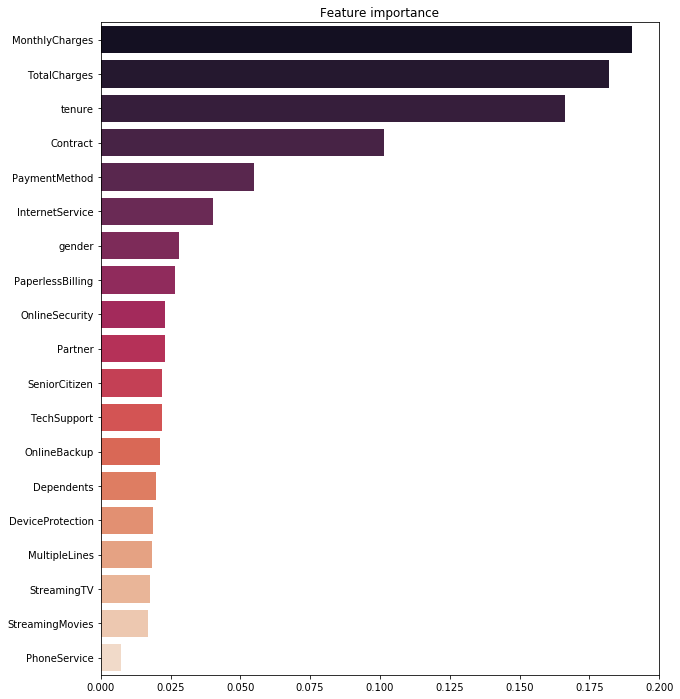

In [45]:
imp = pd.Series(rfc_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="rocket", orient='h')

In [46]:
accuracy=accuracy_score(y_test,rfc_pred)
accuracy

0.7895734597156399

In [47]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[1402  178]
 [ 266  264]]
             precision    recall  f1-score   support

         No       0.84      0.89      0.86      1580
        Yes       0.60      0.50      0.54       530

avg / total       0.78      0.79      0.78      2110

